Testing how implemntation of SmoothedParabolam2min and SmoothedPLm2min

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner as corner
from gwpopulation.utils import powerlaw
import glob
import corner as corner
import os


/opt/conda/igwn-py310-20240410/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from gwpopulation.models.mass import SinglePeakSmoothedMassDistribution, two_component_single

In [3]:
from variable_qmin import SmoothedParabolam2min, SmoothedPowerlawm2min

In [ ]:
[5.65164488e+00 3.53778714e+00 6.73642545e+01 5.22534613e+00
 8.46833491e-02 2.69452725e+01 6.26666303e+00 4.51814843e+00
 2.81455755e-01 2.44810557e-02 6.72600938e-01 3.89209056e+00
 4.44031541e+00]

In [4]:
#points from prior
no_points = 1
dataset={'mass_1':np.linspace(2.,100.,100000), 'mass_ratio':np.linspace(.5,1.,100000)} 
alpha = np.ones(no_points)*.5
beta = np.ones(no_points)*6.5
gamma = np.ones(no_points)*.35
zeta = np.ones(no_points)*-0.0001
mmin = np.ones(no_points)*3.
mmax = np.ones(no_points)*70.
lam = np.ones(no_points)*0.1
mpp  = np.ones(no_points)*35
sigpp = np.ones(no_points)*5.
delta_m = np.ones(no_points)*5.

In [5]:
params = dict(
        alpha=alpha,
        beta =beta,
        gamma=gamma,
        zeta=zeta,
        mmin=2.,
        mmax=100.,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        delta_m=5.,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )

In [7]:
variable_qmin_class = SmoothedParabolam2min()

/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:123: RuntimeWarning: divide by zero encountered in divide
  1 / xp.log(high / low),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:124: RuntimeWarning: divide by zero encountered in divide
  (1 + alpha) / xp.array(high ** (1 + alpha) - low ** (1 + alpha)),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:128: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)


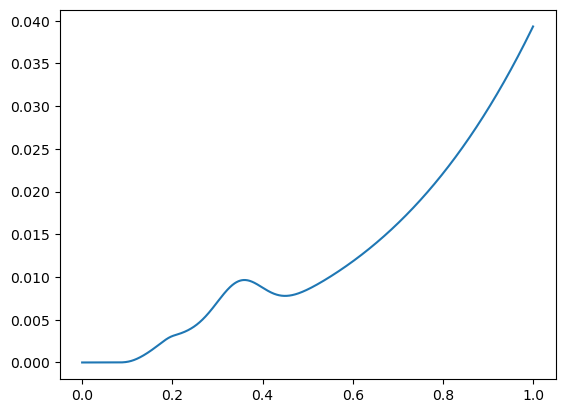

In [7]:
plt.plot(np.linspace(0,1,100000),variable_qmin_class(dataset, **params))

In [8]:
np.sum(variable_qmin_class.p_q(dataset, **params))

TypeError: SmoothedParabolam2min.p_q() got an unexpected keyword argument 'alpha'

In [9]:
import time
start_time = time.time()
print(np.sum(variable_qmin_class(dataset, **params)))
print("--- %s seconds ---" % (time.time() - start_time))

/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:123: RuntimeWarning: divide by zero encountered in divide
  1 / xp.log(high / low),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:124: RuntimeWarning: divide by zero encountered in divide
  (1 + alpha) / xp.array(high ** (1 + alpha) - low ** (1 + alpha)),
/home/storm.colloms/.local/lib/python3.10/site-packages/gwpopulation/utils.py:128: RuntimeWarning: invalid value encountered in multiply
  prob *= (xx <= high) & (xx >= low)


nan
197040.89546946672
1262.875117624118
--- 0.44352293014526367 seconds ---


/home/storm.colloms/O4a_population/variable_qmin/variable_qmin/__init__.py:510: RuntimeWarning: invalid value encountered in multiply
  p_q *= self.smoothing(


In [9]:
params = dict(
        alpha=alpha,
        mmin=2.,
        mmax=100.,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        delta_m=5.,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )
np.sum(variable_qmin_class.p_m1(dataset, **params))

1020.4008090282176

In [7]:
np.sum(variable_qmin_class.p_q(dataset, beta, mmax, mmin, delta_m, gamma, zeta))

196485.65513608145


/home/storm.colloms/O4a_population/variable_qmin/variable_qmin/__init__.py:497: RuntimeWarning: invalid value encountered in divide
  p_q /= self.norm_p_q(beta=beta, mmax=mmax, mmin=mmin, delta_m=delta_m, gamma=gamma, zeta=zeta)


196633.6949031832

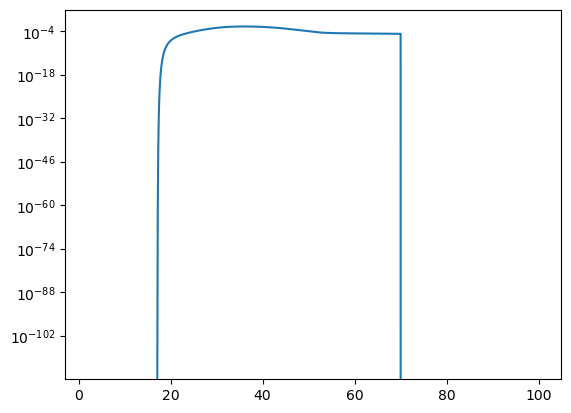

In [12]:
plt.plot(dataset["mass_1"], p_m1)
params = dict(
        alpha=alpha,
        mmin=mmin,
        mmax=mmax,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )
#plt.plot(dataset["mass_1"], two_component_single(dataset["mass_1"], **params))
plt.yscale('log')

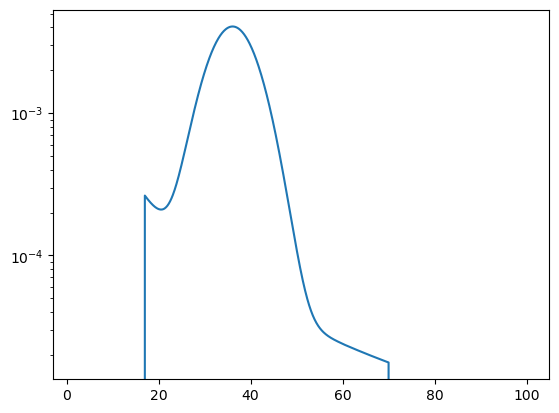

In [6]:
plt.plot(dataset["mass_1"], p_m1)
params = dict(
        alpha=alpha,
        mmin=mmin,
        mmax=mmax,
        lam=lam,
        mpp=mpp,
        sigpp=sigpp,
        gaussian_mass_maximum=np.ones(no_points)*60.,
    )
#plt.plot(dataset["mass_1"], two_component_single(dataset["mass_1"], **params))
plt.yscale('log')